In [2]:
import numpy as np
#generate simulated classification data
def covidData(Nsamp):
    # Set seed so we all have the same data 
     np.random.seed(11) 
     # age as a uniform value [0,1] 
     age = np.random.uniform(low=0.0,high=1.0,size=Nsamp) 
     # Smoke? 
     smoke = np.random.randint(low=0,high=2,size=Nsamp) 
     # number of smokers and nonsmokers 
     nSmoke = np.sum(smoke) 
     nnSmoke = Nsamp - nSmoke 
     death = np.zeros(Nsamp,dtype=int) 
     # Death prob = 0.5 if you don't smoke 
     death[smoke==0] = (np.random.uniform(size=nnSmoke)<0.5) 
     # If you do smoke, then it depends quadratically on age 
     death[smoke==1] = (np.random.uniform(size=(nSmoke))<3./2.*age[smoke==1]**2)
     # stack predictor variables in matrix 
     xPredict = np.stack((age,smoke),axis=1) 
     return(xPredict, death)

In [3]:
#Q1
#Generate data
data = covidData(100)

#Central Tendency Measure
dr_overall = np.mean(data[-1])
dr_smoker = round(np.mean(data[-1][data[0][:,1]==1]),2)
dr_nnsmoker = round(np.mean(data[-1][data[0][:,1]==0]),2)

print("Death rate overall is", dr_overall, "\n"
     "Death rate for smokers is", dr_smoker,"\n"
     "Death rate for nonsmokers is", dr_nnsmoker)


Death rate overall is 0.54 
Death rate for smokers is 0.58 
Death rate for nonsmokers is 0.49


In [4]:
#Q2
# Monte-carlo evaluation of a training and test data
# A function to automate MC experiments
def MCtraintest(nmc,X,y,modelObj,testFrac): 
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc): 
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train) 
        trainScore[i] = modelObj.score(X_train,y_train) 
        testScore[i]  = modelObj.score(X_test,y_test)
    return (trainScore,testScore)

The optimal neighbor size for data is 5.


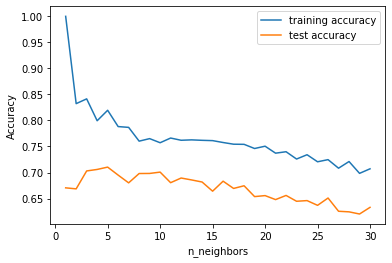

In [5]:
#import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = covidData(100)

nmc = 250
X = data[0]
y = data[1]
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    trainScore, testScore = MCtraintest(nmc, X, y, knn, 0.25)
    # record training set accuracy
    training_accuracy.append(np.mean(trainScore))
    # record generalization accuracy
    test_accuracy.append(np.mean(testScore))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print("The optimal neighbor size for data is 5.")

In [6]:
#Q3
print("The score for the training sample with one neighbor is", training_accuracy[0],".")

The score for the training sample with one neighbor is 1.0 .


In [7]:
#Q4
from sklearn.linear_model import LogisticRegression

nmc = 250
X = data[0]
y = data[1]
training_accuracy = []
test_accuracy = []


# build the model
logreg = LogisticRegression()
trainScore, testScore = MCtraintest(nmc, X, y, logreg, 0.25)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(np.mean(trainScore)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(np.mean(testScore)))

Accuracy of logistic regression classifier on training set: 0.68
Accuracy of logistic regression classifier on test set: 0.64
